# 🧠 Dimensionality Reduction: PCA, t-SNE, UMAP on MNIST

## 📚 Step 1: Import Libraries

In [ ]:
(646,700,3) - color - 646*700*3
(646,700) - grayscale

In [ ]:
646*700- 10000, main_feature


452200

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

## 📥 Step 2: Load MNIST Digits Dataset

In [6]:
digits = load_digits()
X = digits.data
y = digits.target

print("Shape of Data:", X.shape)

Shape of Data: (1797, 64)


In [8]:
print("First 5 rows of Data:")
print(X[:1])

First 5 rows of Data:
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]


## 🔧 Step 3: Standardize the Data

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🎓 Step 4: PCA - Principal Component Analysis

### 🔢 Concept:
- Linearly project data to lower dimensions maximizing variance.
- Finds orthogonal axes (principal components).

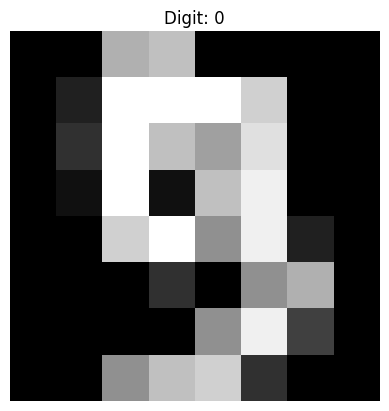

In [13]:
# plot the one digit
plt.imshow(X[9].reshape(8, 8), cmap='gray')
plt.title(f"Digit: {y[0]}")
plt.axis('off')
plt.show()

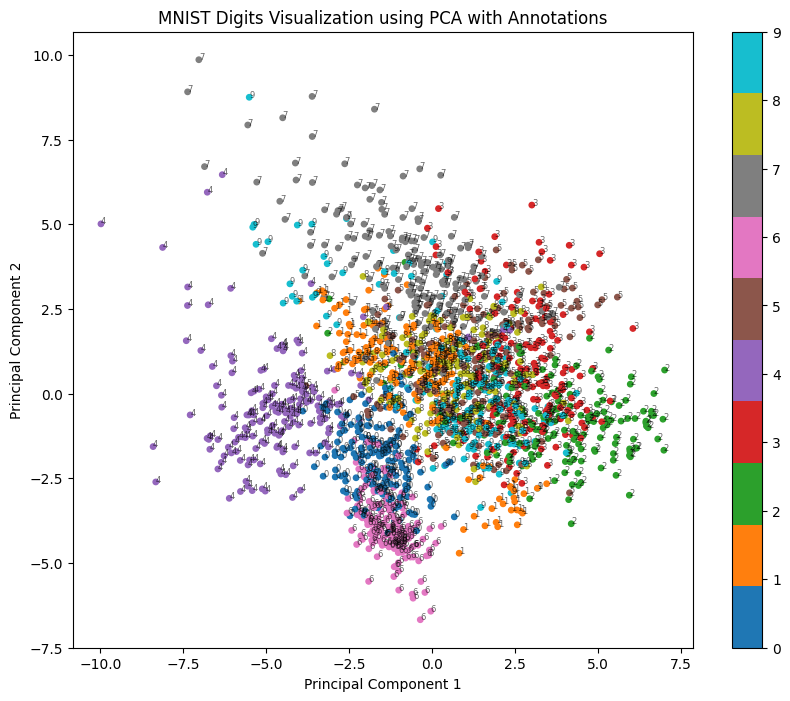

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=15)
plt.colorbar(scatter)
for i in range(len(X_pca)):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y[i]), fontsize=6, alpha=0.6)
plt.title('MNIST Digits Visualization using PCA with Annotations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## 🎓 Step 5: t-SNE - t-Distributed Stochastic Neighbor Embedding

### 🔢 Concept:
- Nonlinear dimensionality reduction.
- Preserves local structure and clusters similar points together.

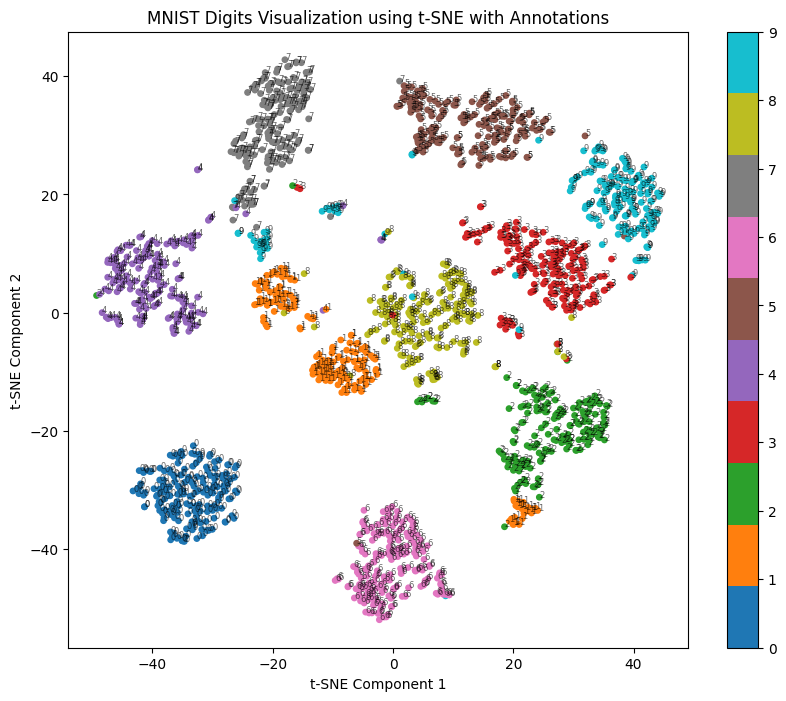

In [14]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=15)
plt.colorbar(scatter)
for i in range(len(X_tsne)):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]), fontsize=6, alpha=0.6)
plt.title('MNIST Digits Visualization using t-SNE with Annotations')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## 🎓 Step 6: UMAP - Uniform Manifold Approximation and Projection

### 🔢 Concept:
- Nonlinear method focused on preserving global and local structure.
- Fast and effective for large datasets.

In [18]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 790.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 733.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 737.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 678.5 kB/s eta 0:00:0000:0100:01


/Library/anaconda3/envs/nlp_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/anaconda3/envs/nlp_env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


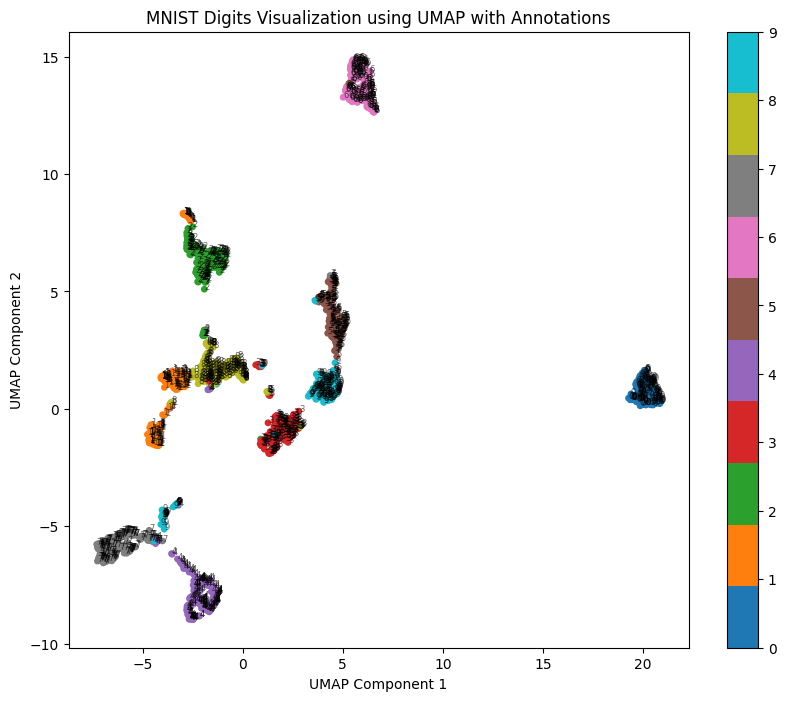

In [19]:

import umap.umap_ as umap
umap_model = umap.UMAP(n_components=2, random_state=42)

X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=15)
plt.colorbar(scatter)
for i in range(len(X_umap)):
    plt.text(X_umap[i, 0], X_umap[i, 1], str(y[i]), fontsize=6, alpha=0.6)
plt.title('MNIST Digits Visualization using UMAP with Annotations')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

## ✅ Step 7: Summary
- **PCA**: Fast, linear, good for visualization but may miss complex patterns.
- **t-SNE**: Preserves local structures, great for clustering, slower.
- **UMAP**: Preserves both global and local structures, faster than t-SNE.

# End of Notebook